In [2]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import matplotlib.patches as mpatches

import sympy
import random

camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)

import camb
from camb import model, initialpower


#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500);
pars.set_matter_power( kmax=2.0)

pars.set_accuracy(AccuracyBoost=2,lSampleBoost=100)
data = camb.get_transfer_functions(pars)
transfer = data.get_cmb_transfer_data()

In [3]:
def Bessel(x,l):
    return sp.special.spherical_jn(l,x)


#If S is separable S = S_1*S_2*S_3, please plug in the functions here. 
def S_1(k1):
    
    return 1

def S_2(k2):
    
    return 1

def S_3(k3):
    
    return 1


In [4]:
def Int(x,l_index,l_index_index):
    
    Stepwidth = transfer.q[1:]-transfer.q[:-1]
    Delta = transfer.delta_p_l_k[0,l_index,:][:-1]
    
    if(l_index_index == 1):
        Svals = S_1(transfer.q[:-1])
    if(l_index_index == 2):
        Svals = S_2(transfer.q[:-1])
    if(l_index_index == 3):
        Svals = S_3(transfer.q[:-1])
        
    Del_Step = Stepwidth * Delta * Svals
    j_l = Bessel(np.tensordot(transfer.q[:-1],x,0),transfer.l[l_index])
    Integral = Del_Step.dot(j_l)
    
    return Integral


In [5]:
def FatInt(l1_index,x_sample,l2_index = 0,l3_index = 0,PlotIntegrand = False, UseSameInt = False):
    
    #If S happens to factor into S = f(k1)*f(k2)*f(k3), one can set UnseSameInt = True, if all ls are the same.
    #This fastens up calculations by -roughly- factor 3.
    
    if(l2_index == 0):
        l2_index = l1_index
        l3_index = l1_index
    
    Norming = (2./np.pi)**3
    
    Stepwidth = x_sample[1:]-x_sample[:-1]
    x_squared_Stepwidth = x_sample[:-1]**2*Stepwidth
    
    if(UseSameInt == False):

        Integralvalue = x_squared_Stepwidth.dot((Int(x_sample,l1_index,1)*Int(x_sample,l2_index,2)*Int(x_sample,l3_index,3))[:-1])
        if(PlotIntegrand == True):


            plt.plot(x_sample,x_sample**2*Int(x_sample,l1_index,1)**3)
            plt.show()
        return Integralvalue*Norming
    
    if(UseSameInt == True and l1_index == l2_index == l3_index):

        Integralvalue = x_squared_Stepwidth.dot(Int(x_sample,l1_index,1)[:-1]**3)
        if(PlotIntegrand == True):

            plt.plot(x_sample,x_sample**2*Int(x_sample,l1_index,1)**3)
            plt.show()
            
        return Integralvalue*Norming
        
        
    else:
        print("THE L ARE NOT THE SAME; MAN")
        
        

In [6]:
def getx(l_index):
    l = transfer.l[l_index]
    
    if(0<= l <= 5):
        return np.linspace(0,30000,800)
    if(5< l <= 10):
        return np.linspace(7000,20000,800)
    if(10< l <= 30):
        return np.linspace(12000,17000,400)
    if(30< l <= 70):
        return np.linspace(12500,15000,400)
    if(70< l <= 170):
        return np.linspace(12500,15000,400)
    if(170< l <= 220):
        return np.linspace(13300,14500,400)
    if(220< l <= 269):
        return np.linspace(13300,14100,400)
    if(269<l < 320):
        return np.linspace(13400,14000,400)
    if(320 <l < 360):
        return np.linspace(13400,14000,400)
    if(360 <l < 440):
        return np.linspace(13650,14000,400)
    if(440 <l < 500):
        return np.linspace(13600,14000,400)
    else:
        return np.linspace(13600,14000,400)
    

In [7]:
def getx_more(l_index):
    #Here, any different sampling in x can be plugged in. For most shapes, this sampling is sufficient.
    
    l = transfer.l[l_index]
    
    if(0<= l <= 5):
        return np.linspace(0,30000,800)
    if(5< l <= 10):
        return np.linspace(7000,20000,800)
    if(10< l <= 30):
        return np.linspace(12000,17000,200)
    if(30< l <= 70):
        return np.linspace(12500,15000,200)
    if(70< l <= 170):
        return np.linspace(12500,15000,200)
    if(170< l <= 220):
        return np.linspace(13300,14500,200)
    if(220< l <= 269):
        return np.linspace(13300,14100,200)
    if(269<l < 320):
        return np.linspace(13400,14000,200)
    if(320 <l < 360):
        return np.linspace(13400,14000,200)
    if(360 <l < 440):
        return np.linspace(13300,14000,200)
    if(440 <l < 500):
        return np.linspace(13300,14000,200)
    else:
        return np.linspace(13600,14000,200)
    

In [10]:
def blll_const(l1,l2= 0 ,l3 = 0):
    
    if(l2 == 0):
        l2 = l1
        l3 = l1
    
    return 1/27*1/(2*l1+1)*1/(2*l2+1)*1/(2*l3+1)*(1/((l1+l2+l3)+3)+1/(l1+l2+l3))


In [15]:
blllArray = []
l_list = np.load("l_list.npy")
Reduced_L_List = l_list[::5] #Just change this 5 to a 1, if you are interested in the full b_lll
for l_index in Reduced_L_List:
    print(l_index)
    blllArray.append(FatInt(l_index,getx_more(l_index),UseSameInt=True)/blll_const(transfer.l[l_index]))
blllArray = np.array(blllArray)

0
5
10


KeyboardInterrupt: 

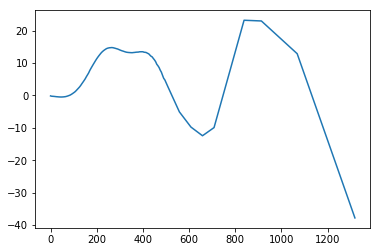

In [13]:
plt.plot(Reduced_L_List, blllArray)

plt.show()